# Data Visualization :

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import os

import sys
sys.path.append('src/')

import loading
import preprocessing

In [5]:
glossary = pd.read_csv(os.path.join("data", "variables_glossary.csv"), sep=";")
print(glossary.shape)
glossary.head()

(61, 4)


,Table,Position,Nom,Description
0,mutation,1,idmutation,identifiant de clef primaire de la table mutation
1,mutation,2,idmutinvar,identifiant invariant de la mutation
2,mutation,3,idopendata,identifiant de mutation
3,mutation,4,idnatmut,identifiant de clef primaire de la table ann_n...
4,mutation,5,codservch,code du service de conservation des hypothèques


In [6]:
df = loading.load_data()

mutations_d77_localized.csv
mutations_d94_localized.csv
mutations_d93_localized.csv
.DS_Store
variables_glossary.csv
mutations_d78_localized.csv
decoupage_communal
.ipynb_checkpoints
mutations_d92_localized.csv
mutations_d75_localized.csv
mutations_d95_localized.csv
mutations_d91_localized.csv


In [7]:
df_sell, df_buy = preprocessing.filter_dataset(df)
df_sell = preprocessing.add_geodata(df_sell)
df_buy = preprocessing.add_geodata(df_buy)

src/preprocessing.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sell['valm2'] = df_sell.valeurfonc/df_sell.sbatapt


In [8]:
print(df_sell.shape)
df_sell.head()

(19185, 11)


,anneemut,moismut,coddep,l_codinsee,latitude,longitude,nblot,valm2,rooms,insee,geometry
0,2017,12,77,77131,48.807846,3.088145,2,3244.897959,2,77131,"POLYGON ((3.08470 48.78774, 3.08229 48.79626, ..."
1,2018,6,77,77330,48.932906,2.886263,2,3266.545455,3,77330,"POLYGON ((2.90638 48.91413, 2.89629 48.91295, ..."
2,2017,2,77,77326,48.577792,2.559852,2,4186.842105,1,77326,"POLYGON ((2.56035 48.56623, 2.55574 48.57071, ..."
3,2014,7,77,77152,48.520764,2.626232,4,2345.679012,4,77152,"POLYGON ((2.64100 48.49451, 2.63405 48.49695, ..."
4,2015,9,77,77284,48.960648,2.883236,2,4486.363636,2,77284,"POLYGON ((2.91670 48.94048, 2.89731 48.93667, ..."


In [9]:
print(df_buy.shape)
df_buy.head()

(24205, 9)


,anneemut,moismut,coddep,l_codinsee,latitude,longitude,valm2,insee,geometry
0,2014.0,3.0,77.0,77051,48.411341,3.244150,0.000130,77051,"POLYGON ((3.25431 48.40923, 3.23598 48.40515, ..."
1,2019.0,12.0,77.0,77058,48.840547,2.725606,0.715564,77058,"POLYGON ((2.72802 48.79730, 2.72119 48.80604, ..."
2,2014.0,10.0,77.0,77108,48.888489,2.609890,0.085812,77108,"POLYGON ((2.62568 48.87413, 2.61537 48.86871, ..."
3,2019.0,9.0,77.0,77330,48.934583,2.887611,410.447761,77330,"POLYGON ((2.90638 48.91413, 2.89629 48.91295, ..."
4,2016.0,2.0,77.0,77268,48.871396,2.817855,0.132532,77268,"POLYGON ((2.83451 48.85938, 2.81443 48.85568, ..."


## Simple distribution heatmaps

In [10]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [33]:
map_sell = folium.Map(location=[48.868229, 2.347402],
                    zoom_start = 12) 
map_sell

### Sold new appartments

In [12]:
map_sell = folium.Map(location=[48.868229, 2.347402],
                    zoom_start = 12) 
coords_sell = df_sell[['latitude', 'longitude']]
coords_sell = coords_sell.dropna(axis=0, subset=['latitude','longitude'])
coords_sell = [[row['latitude'],row['longitude']] for index, row in coords_sell.iterrows()]
HeatMap(coords_sell).add_to(map_sell)
map_sell

### Bought land

In [14]:
map_buy = folium.Map(location=[48.868229, 2.347402],
                    zoom_start = 12) 
coords_buy = df_buy[['latitude', 'longitude']]
coords_buy = coords_buy.dropna(axis=0, subset=['latitude','longitude'])
coords_buy = [[row['latitude'],row['longitude']] for index, row in coords_buy.iterrows()]
HeatMap(coords_buy).add_to(map_buy)
map_buy

## Communal representations

In [26]:
communal_valm2 = df_sell.loc[:,["insee", "valm2"]].groupby(by=["insee"]).mean().reset_index()
print(communal_valm2.shape)
communal_valm2 = gpd.GeoDataFrame(communal_valm2.merge(df_sell.loc[:,["insee", "geometry"]].drop_duplicates()).drop(columns="insee"))
communal_valm2


(394, 2)


,valm2,geometry
0,11666.666667,"POLYGON ((2.35083 48.86334, 2.32788 48.86986, ..."
1,14428.274428,"POLYGON ((2.36432 48.84617, 2.34456 48.85399, ..."
2,10654.157259,"POLYGON ((2.31663 48.84676, 2.30734 48.84770, ..."
3,11539.632238,"POLYGON ((2.32575 48.86955, 2.32712 48.88348, ..."
4,9069.730937,"POLYGON ((2.36386 48.86743, 2.35411 48.86928, ..."
...,...,...
389,3674.352096,"POLYGON ((2.04059 49.02569, 2.02705 49.02037, ..."
390,4015.610384,"POLYGON ((2.56934 49.03959, 2.56771 49.04140, ..."
391,3313.632218,"POLYGON ((2.36725 49.06829, 2.33864 49.07661, ..."
392,3594.978381,"POLYGON ((2.52828 49.03796, 2.52758 49.04763, ..."


<AxesSubplot:>

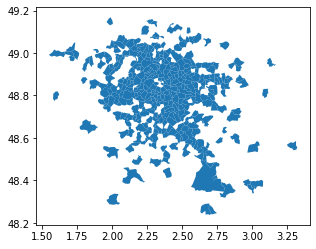

In [27]:
communal_valm2.plot()

In [32]:
communal_map = folium.Map(location=[48.868229, 2.347402],
                    zoom_start = 12)
for ind, row in communal_valm2.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(row['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'blue'})
    #folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(communal_map)
communal_map